# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
path = 'C:\\Users\\Marce\\careerfoundry\\food'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'currencyrdy.csv'))

In [5]:
df.columns

Index(['Country', 'Product/Category', 'Month', 'Year', 'Price/USD'], dtype='object')

In [6]:
df.head(5)

,Country,Product/Category,Month,Year,Price/USD
0,Afghanistan,Bread - Retail,Jan,2000,0.1777
1,Afghanistan,Bread - Retail,Jan,2001,0.2078
2,Afghanistan,Bread - Retail,Jan,2002,0.1060
3,Afghanistan,Bread - Retail,Jan,2003,0.1515
4,Afghanistan,Bread - Retail,Jan,2004,0.1751


In [7]:
df.shape

(107108, 5)

In [8]:
df.isnull().sum()

Country                0
Product/Category       0
Month                  0
Year                   0
Price/USD           5316
dtype: int64

In [9]:
df['PriceUSD'].fillna(df['PriceUSD'].median(), inplace = True)

In [10]:
df.describe()

,Year,Price/USD
count,107108.000000,107108.000000
mean,2014.571414,13.291063
std,4.778718,381.852362
min,1992.000000,0.000000
25%,2011.000000,0.458300
50%,2015.000000,0.892300
75%,2019.000000,2.539400
max,2021.000000,39937.572400


In [11]:
dups = df.duplicated()

In [12]:
# no dups

dups.shape

(107108,)

C:\Users\Marce\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price/USD', ylabel='Density'>

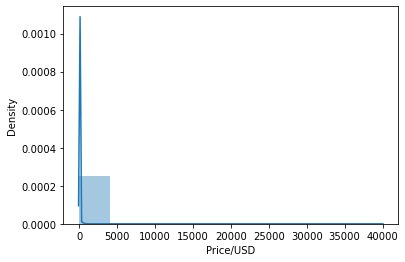

In [13]:
sns.distplot(df['Price/USD'], bins=10) # Shows extreme values

In [14]:
# check mean

df['Price/USD'].mean()

13.291062797361578

In [15]:
# check median

df['Price/USD'].median() # Check the median

0.8923

In [16]:
# check max

df['Price/USD'].max() # Check the max

39937.5724

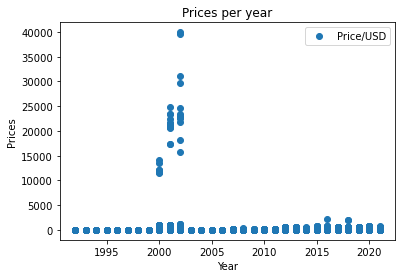

In [17]:
df.plot (x="Year", y="Price/USD", style="o")
plt.title("Prices per year")
plt.xlabel("Year")
plt.ylabel("Prices")
plt.show()

# Hypothesis = Increasing years have a positive effect on prices.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year'].values.reshape(-1,1)
y = df['Price/USD'].values.reshape(-1,1)

In [19]:
X

array([[2000],
       [2001],
       [2002],
       ...,
       [2020],
       [2020],
       [2020]], dtype=int64)

In [20]:
y

array([[0.1777],
       [0.2078],
       [0.106 ],
       ...,
       [0.7934],
       [0.7817],
       [0.7834]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# create a regression object

regression = LinearRegression()

In [23]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

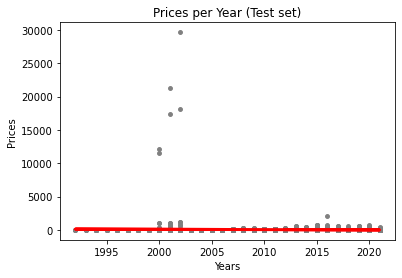

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color="gray", s = 15)
plot_test.plot(X_test, y_predicted, color = "red", linewidth = 3)
plot_test.title("Prices per Year (Test set)")
plot_test.xlabel("Years")
plot_test.ylabel("Prices")
plt.savefig('regression.png')
plot_test.show()

## the line doesn't fit the data

In [26]:
# create objects with model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4.29857866]]
Mean squared error:  70824.16999798988
R2 score:  -0.0003984335512148274


In [28]:
y_predicted

array([[47.11604051],
       [55.71319782],
       [21.32456858],
       ...,
       [51.41461917],
       [-4.46690335],
       [25.62314723]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.4600,47.116041
1,0.0482,55.713198
2,0.1036,21.324569
3,0.8530,17.025990
4,0.8572,21.324569
5,0.2158,55.713198
6,4.3606,17.025990
7,3.6245,34.220305
8,0.6525,-4.466903
9,0.5947,-4.466903


## the model performed badly on the test set. bias is unlikely, but my mistake (which I realized now), probably was not to unify the different currencies